In [ ]:
import os

def rename_images_based_on_class(root_dir):

    for class_name in os.listdir(root_dir):
        class_dir = os.path.join(root_dir, class_name)
        if os.path.isdir(class_dir):

            for filename in os.listdir(class_dir):
                file_path = os.path.join(class_dir, filename)

                new_filename = class_name + '_' + filename  
                new_file_path = os.path.join(class_dir, new_filename)
                os.rename(file_path, new_file_path)
                print(f"Renamed {filename} to {new_filename}")

if __name__ == '__main__':
    dataset_root = './dataset/val/'
    rename_images_based_on_class(dataset_root)

### Glaucoma 

 - referable glaucoma (RG) - glaukomaga tavsiya etilgan 
 - non-referable glaucoma (NRG) - glaukomaga tavsiya etilmagan 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv("./metadata.csv",index_col='id')

In [36]:
df.head(10)

,file_name,label,label_binary,folder,source_dataset,relative_file_type,file_path
id,,,,,,,
2580,EyePACS-TRAIN-RG-2580.jpg,RG,1,validation,EyePACS-TRAIN,jpg,/eyepac-light-v2-512-jpg/validation/RG/
2617,EyePACS-TRAIN-RG-2617.jpg,RG,1,validation,EyePACS-TRAIN,jpg,/eyepac-light-v2-512-jpg/validation/RG/
2794,EyePACS-TRAIN-RG-2794.jpg,RG,1,validation,EyePACS-TRAIN,jpg,/eyepac-light-v2-512-jpg/validation/RG/
2696,EyePACS-TRAIN-RG-2696.jpg,RG,1,validation,EyePACS-TRAIN,jpg,/eyepac-light-v2-512-jpg/validation/RG/
2585,EyePACS-TRAIN-RG-2585.jpg,RG,1,validation,EyePACS-TRAIN,jpg,/eyepac-light-v2-512-jpg/validation/RG/
2637,EyePACS-TRAIN-RG-2637.jpg,RG,1,validation,EyePACS-TRAIN,jpg,/eyepac-light-v2-512-jpg/validation/RG/
2537,EyePACS-TRAIN-RG-2537.jpg,RG,1,validation,EyePACS-TRAIN,jpg,/eyepac-light-v2-512-jpg/validation/RG/
2732,EyePACS-TRAIN-RG-2732.jpg,RG,1,validation,EyePACS-TRAIN,jpg,/eyepac-light-v2-512-jpg/validation/RG/
2707,EyePACS-TRAIN-RG-2707.jpg,RG,1,validation,EyePACS-TRAIN,jpg,/eyepac-light-v2-512-jpg/validation/RG/


In [40]:
df.sort_index(inplace=True)

In [41]:
df.head(10)

,file_name,label,label_binary,folder,source_dataset,relative_file_type,file_path
id,,,,,,,
1,EyePACS-TRAIN-RG-1.jpg,RG,1,train,EyePACS-TRAIN,jpg,/eyepac-light-v2-512-jpg/train/RG/
1,EyePACS-DEV-NRG-1.jpg,NRG,0,train,EyePACS-DEV,jpg,/eyepac-light-v2-512-jpg/train/NRG/
1,EyePACS-TRAIN-NRG-1.jpg,NRG,0,train,EyePACS-TRAIN,jpg,/eyepac-light-v2-512-jpg/train/NRG/
1,EyePACS-DEV-RG-1.jpg,RG,1,train,EyePACS-DEV,jpg,/eyepac-light-v2-512-jpg/train/RG/
2,EyePACS-DEV-RG-2.jpg,RG,1,train,EyePACS-DEV,jpg,/eyepac-light-v2-512-jpg/train/RG/
2,EyePACS-TRAIN-RG-2.jpg,RG,1,train,EyePACS-TRAIN,jpg,/eyepac-light-v2-512-jpg/train/RG/
2,EyePACS-DEV-NRG-2.jpg,NRG,0,train,EyePACS-DEV,jpg,/eyepac-light-v2-512-jpg/train/NRG/
2,EyePACS-TRAIN-NRG-2.jpg,NRG,0,train,EyePACS-TRAIN,jpg,/eyepac-light-v2-512-jpg/train/NRG/
3,EyePACS-TRAIN-NRG-3.jpg,NRG,0,train,EyePACS-TRAIN,jpg,/eyepac-light-v2-512-jpg/train/NRG/


In [42]:
df.tail(10)

,file_name,label,label_binary,folder,source_dataset,relative_file_type,file_path
id,,,,,,,
3266,EyePACS-TRAIN-RG-3266.jpg,RG,1,test,EyePACS-TRAIN,jpg,/eyepac-light-v2-512-jpg/test/RG/
3266,EyePACS-TRAIN-NRG-3266.jpg,NRG,0,test,EyePACS-TRAIN,jpg,/eyepac-light-v2-512-jpg/test/NRG/
3267,EyePACS-TRAIN-RG-3267.jpg,RG,1,test,EyePACS-TRAIN,jpg,/eyepac-light-v2-512-jpg/test/RG/
3267,EyePACS-TRAIN-NRG-3267.jpg,NRG,0,test,EyePACS-TRAIN,jpg,/eyepac-light-v2-512-jpg/test/NRG/
3268,EyePACS-TRAIN-NRG-3268.jpg,NRG,0,test,EyePACS-TRAIN,jpg,/eyepac-light-v2-512-jpg/test/NRG/
3268,EyePACS-TRAIN-RG-3268.jpg,RG,1,test,EyePACS-TRAIN,jpg,/eyepac-light-v2-512-jpg/test/RG/
3269,EyePACS-TRAIN-RG-3269.jpg,RG,1,test,EyePACS-TRAIN,jpg,/eyepac-light-v2-512-jpg/test/RG/
3269,EyePACS-TRAIN-NRG-3269.jpg,NRG,0,test,EyePACS-TRAIN,jpg,/eyepac-light-v2-512-jpg/test/NRG/
3270,EyePACS-TRAIN-RG-3270.jpg,RG,1,test,EyePACS-TRAIN,jpg,/eyepac-light-v2-512-jpg/test/RG/


### Jadval o'lchami

In [43]:
df.shape

(9540, 7)

In [44]:
df.isnull().sum()

file_name             0
label                 0
label_binary          0
folder                0
source_dataset        0
relative_file_type    0
file_path             0
dtype: int64

In [45]:
df.duplicated().sum()

0

In [46]:
df['label'].value_counts()

label
RG     4770
NRG    4770
Name: count, dtype: int64

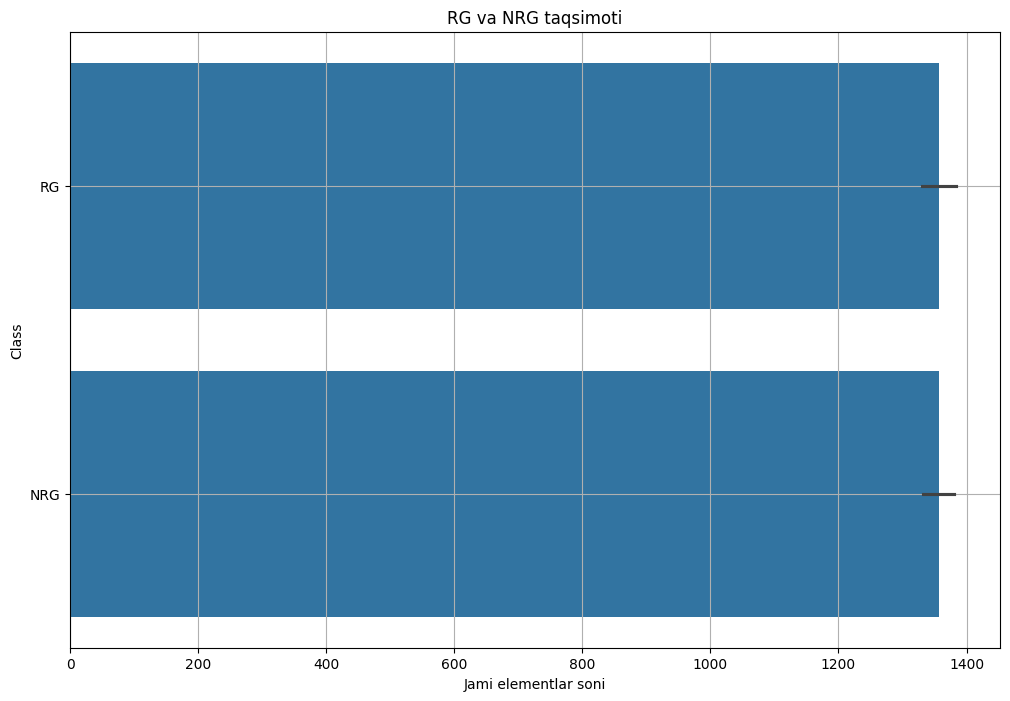

In [53]:
plt.figure(figsize=(12,8))
sns.barplot(data=df['label'])
plt.title("RG va NRG taqsimoti")
plt.xlabel("Jami elementlar soni")
plt.ylabel("Class")
plt.grid()
plt.show()

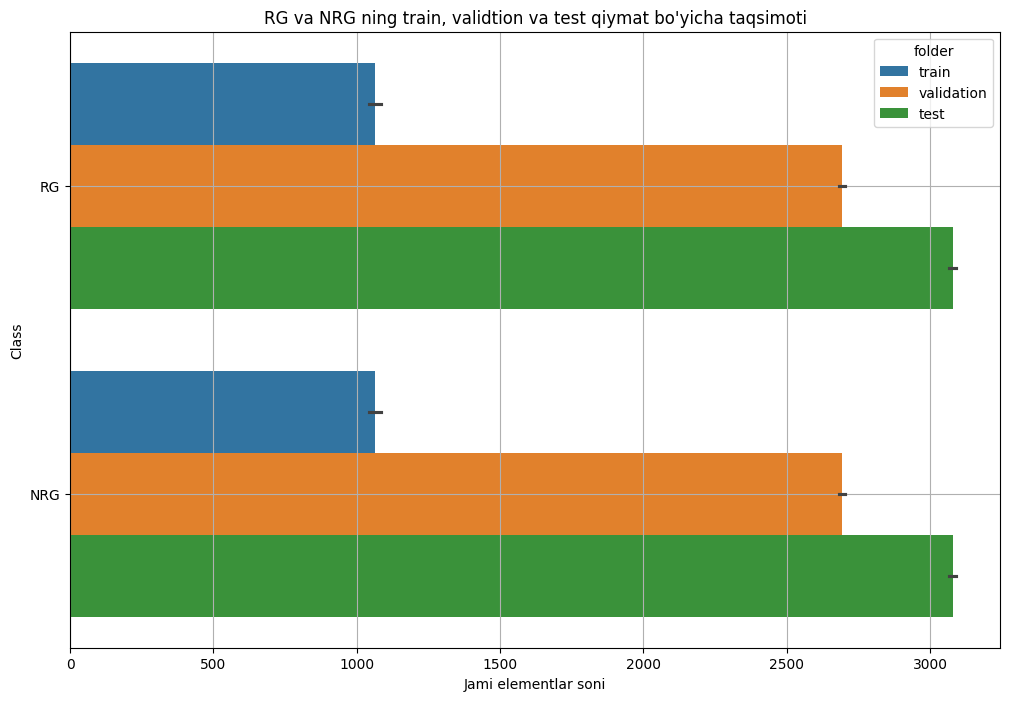

In [54]:
plt.figure(figsize=(12,8))
sns.barplot(data=df,x=df.index,y=df['label'],hue=df['folder'])
plt.title("RG va NRG ning train, validtion va test qiymat bo'yicha taqsimoti")
plt.xlabel("Jami elementlar soni")
plt.ylabel("Class")
plt.grid()
plt.show()

In [49]:
df['folder'].value_counts()

folder
train         8000
validation     770
test           770
Name: count, dtype: int64

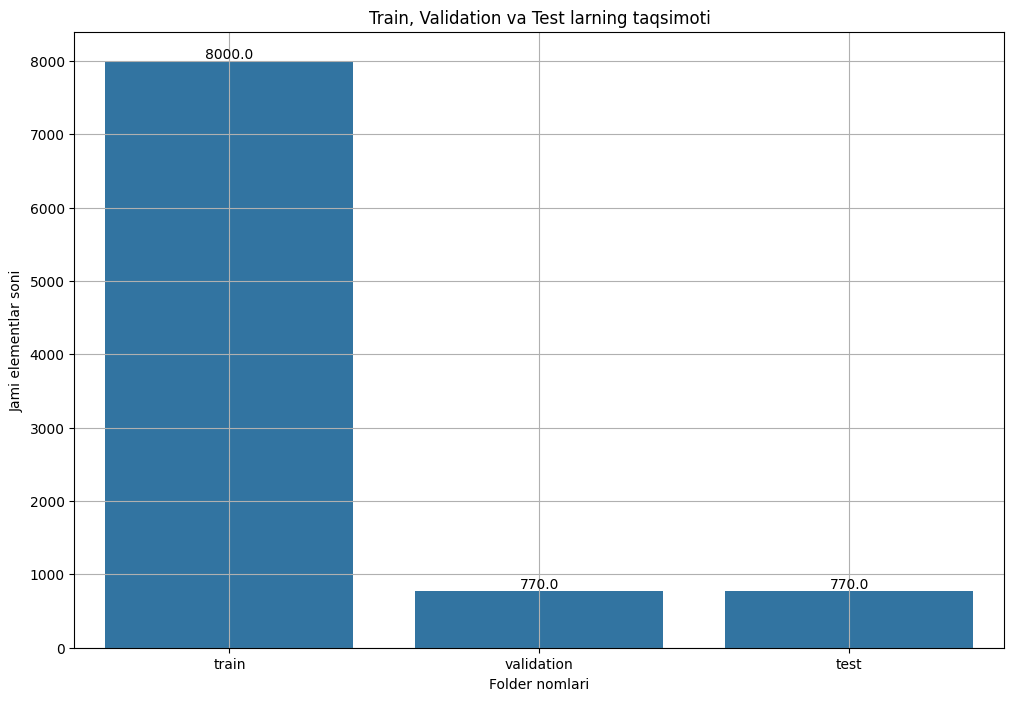

In [59]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='folder')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                xy=(p.get_x() + p.get_width() / 2., height),
                xytext=(0, 5),  # 5 points vertical offset
                textcoords='offset points',
                ha='center', va='center')

plt.title("Train, Validation va Test larning taqsimoti")
plt.xlabel("Folder nomlari")
plt.ylabel("Jami elementlar soni")
plt.grid(True)
plt.show()